<a href="https://colab.research.google.com/github/dev0419/pytorch-deep-learning/blob/main/pytorch_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [59]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [60]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [61]:
n_samples = 1000
X,y =  make_circles(n_samples,noise=0.03,random_state=42)
len(X),len(y)

(1000, 1000)

In [62]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [63]:
import pandas as pd
circles = pd.DataFrame({'X1':X[:,0],
                        'X2':X[:,1],
                        'label':y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [64]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

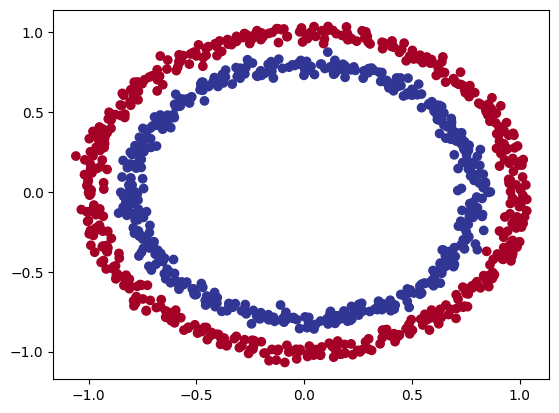

In [65]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [66]:
X.shape,y.shape

((1000, 2), (1000,))

In [67]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [68]:
X_sample,y_sample = X[0],y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes of sample of X: {X_sample.shape} and y : {y.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes of sample of X: (2,) and y : (1000,)


In [69]:
type(X),X.dtype


(numpy.ndarray, dtype('float64'))

In [70]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [71]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [73]:
n_samples

1000

In [74]:
X_train.shape

torch.Size([800, 2])

In [75]:
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [76]:
from sklearn import datasets
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model = CircleModel().to(device)
model


CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [77]:
device

'cuda'

In [78]:
next(model.parameters()).device

device(type='cuda', index=0)

In [79]:
model = nn.Sequential(nn.Linear(in_features = 2,out_features = 5),
                      nn.Linear(in_features = 5,out_features = 1)).to(device)
model

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [80]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4897,  0.5662],
                      [-0.1459, -0.2929],
                      [ 0.4047,  0.3076],
                      [ 0.3882,  0.3076],
                      [-0.1918,  0.6142]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5453,  0.2317, -0.1084, -0.3834, -0.4279], device='cuda:0')),
             ('1.weight',
              tensor([[0.4248, 0.2738, 0.2590, 0.4036, 0.1129]], device='cuda:0')),
             ('1.bias', tensor([-0.3258], device='cuda:0'))])

In [81]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr = 0.01)

In [82]:
def accuracy(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc


In [83]:
y_logits = model(X_test.to(device))[:5]
y_logits[:5]

tensor([[ 0.0372],
        [ 0.1543],
        [-0.3924],
        [ 0.1595],
        [-0.5874]], device='cuda:0', grad_fn=<SliceBackward0>)

In [84]:
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5093],
        [0.5385],
        [0.4031],
        [0.5398],
        [0.3572]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [92]:
y_preds = torch.round(y_preds_probs)
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [93]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [94]:
torch.manual_seed(42)
epochs = 100
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model.train()
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_pred,y_train)
  acc = accuracy(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_pred,y_test)
    test_acc = accuracy(y_test,test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%
Epoch: 10 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%
Epoch: 20 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%
Epoch: 30 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%
Epoch: 40 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%
Epoch: 50 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%
Epoch: 60 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%
Epoch: 70 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%
Epoch: 80 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%
Epoch: 90 | Loss: 0.74258, Accuracy: 46.00% | Test loss: 0.74848, Test acc: 46.50%


In [95]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary


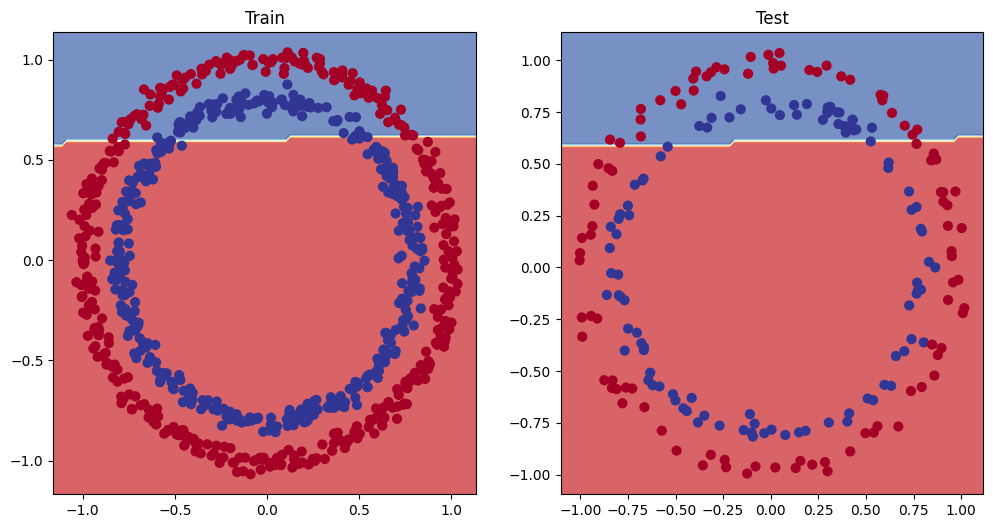

In [97]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)

In [101]:
class CircleModel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModel1().to(device)
model_1

CircleModel1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [102]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [104]:
torch.manual_seed(42)
epochs = 1000
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_preds,y_train)
  acc = accuracy(y_train,y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_preds,y_test)
    test_acc = accuracy(y_train,test_preds)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

RuntimeError: The size of tensor a (800) must match the size of tensor b (200) at non-singleton dimension 0